In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
orders = pd.read_csv(r"C:\Users\hp\Downloads\orders.csv", encoding="latin1")
order_details = pd.read_csv(r"C:\Users\hp\Downloads\order_details.csv", encoding="latin1")
pizzas = pd.read_csv(r"C:\Users\hp\Downloads\pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv(r"C:\Users\hp\Downloads\pizza_types.csv", encoding="latin1")


In [7]:
df = order_details.merge(orders, on="order_id") \
                  .merge(pizzas, on="pizza_id") \
                  .merge(pizza_types, on="pizza_type_id")



In [8]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [9]:
# Convert date and time
df["date"] = pd.to_datetime(df["date"])
df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.hour

# Create revenue column
df["revenue"] = df["quantity"] * df["price"]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  hour              48620 non-null  int32         
 13  revenue           48620 non-null  float64       
dtypes: datetime64[ns](1), 

In [10]:
total_revenue = df["revenue"].sum()
total_revenue


817860.05

# 1. Total Revenue

Insight:
The pizza place generated a total revenue of $817,860.05 over the year. This indicates strong overall business performance and steady customer demand throughout the period analyzed.

In [11]:
total_quantity = df["quantity"].sum()
total_quantity


49574

# 2. Total Quantity Sold

Insight:
A total of 49,574 pizzas were sold during the year. This suggests a high volume of transactions and consistent patronage.

In [12]:
total_orders = df["order_id"].nunique()
total_orders


21350

# 3. Total Orders

Insight:
There were 21,350 unique orders placed. On average, each order contained more than one pizza, which may indicate group purchases or successful upselling strategies.

In [14]:
num_pizza_types = df["name"].nunique()
num_pizza_types


32

4. Number of Pizza Types

Insight:
The restaurant offers 32 different pizza types, providing customers with a wide variety of choices. A diverse menu can attract a broader customer base but may also require careful inventory management.

In [15]:
avg_price = df["price"].mean()
avg_price


16.494132044426163

# 5. Average Price of Pizzas

Insight:
The average price of pizzas is approximately $16.49, reflecting a mid-range pricing strategy that balances affordability with profitability.

In [16]:
hourly_sales = df.groupby("hour")["revenue"].sum().sort_values(ascending=False)

hourly_sales


hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: revenue, dtype: float64

# 6. Peak Hours of Sales

Insight:
Sales peak during lunch (12–1 PM) and dinner hours (5–7 PM). This aligns with typical meal times and suggests that staffing and promotional efforts should be concentrated around these periods.

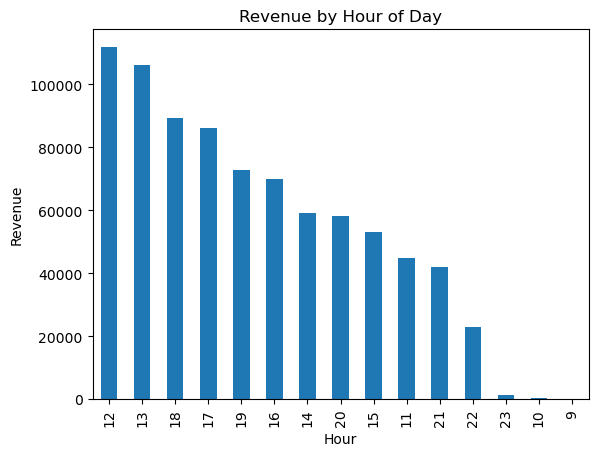

In [18]:
plt.figure()
hourly_sales.plot(kind="bar")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()


# 7. Sales by Day of the Week

Insight:
Fridays record the highest sales, followed closely by other weekdays. This suggests increased customer activity toward the end of the workweek, possibly due to social gatherings and leisure dining.

8. Top 5 Bestselling Pi

In [19]:
df["day"] = df["date"].dt.day_name()

sales_by_day = df.groupby("day")["revenue"].sum().sort_values(ascending=False)
sales_by_day


day
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

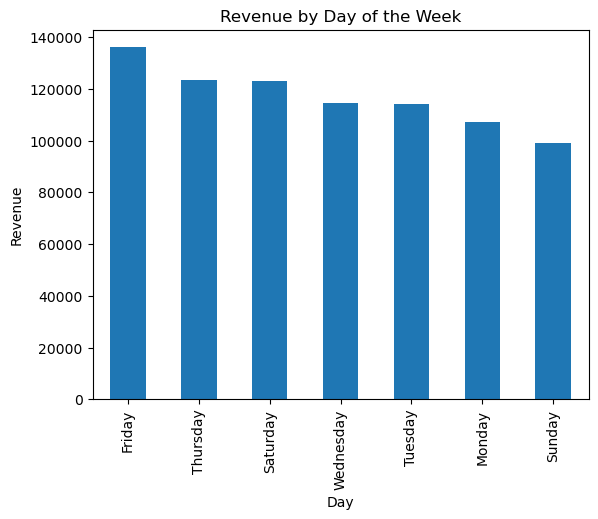

In [20]:
plt.figure()
sales_by_day.plot(kind="bar")
plt.title("Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()


# 8. Top 5 Bestselling Pizzas

Insight:
A small number of pizzas account for a disproportionately large share of total sales. These bestsellers should be prominently featured in marketing materials and menu placements to maximize revenue.

In [21]:
top_5_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
top_5_pizzas


name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

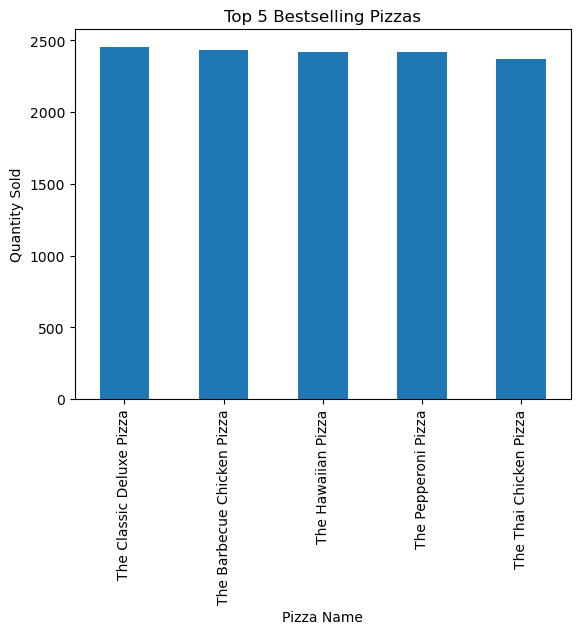

In [33]:
plt.figure()
top_5_pizzas.plot(kind="bar")
plt.title("Top 5 Bestselling Pizzas")
plt.xticks(rotation=90)
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.show()


# 9. Sales by Month (Trend Analysis)

Insight:
Monthly revenue shows mild seasonality, with sales peaking around the middle of the year (particularly in July) and a slight dip observed in September–October. Overall, sales remain relatively stable across the year, indicating consistent demand with modest seasonal effects.

In [29]:
df["month"] = df["date"].dt.month_name()

monthly_sales = df.groupby("month")["revenue"].sum()
monthly_sales


month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: revenue, dtype: float64

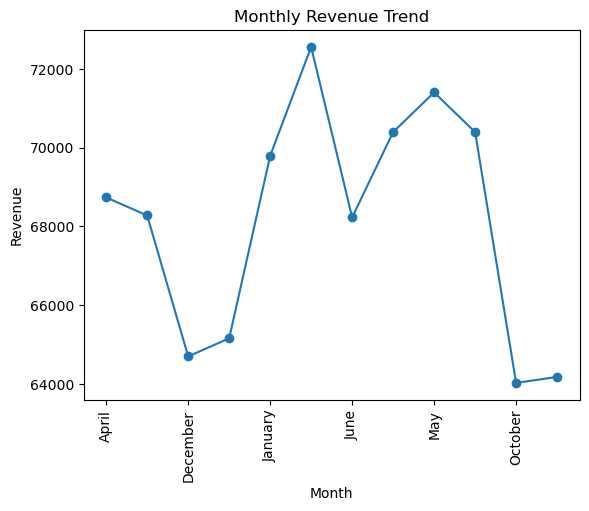

In [35]:
plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


# 10. Poorly Performing Pizzas

Insight:
Several pizza types consistently record low sales volumes. These items may benefit from recipe improvements, targeted promotions, or potential removal from the menu to optimize inventory and reduce waste.

In [34]:
worst_5_pizzas = df.groupby("name")["quantity"].sum().sort_values().head(5)
worst_5_pizzas


name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

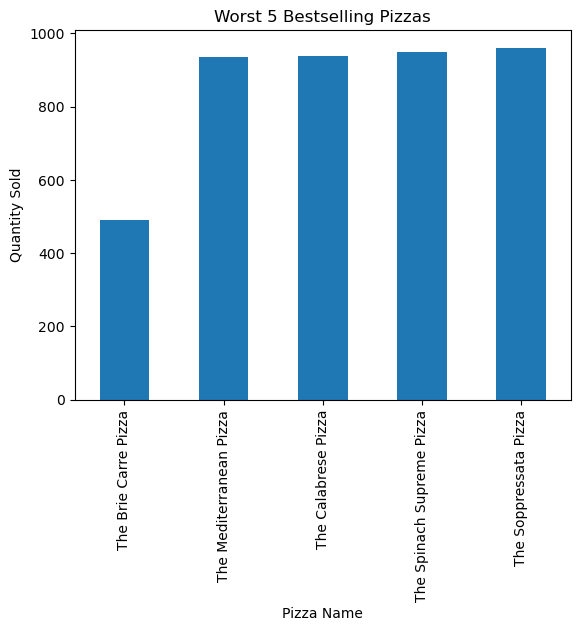

In [36]:
plt.figure()
worst_5_pizzas.plot(kind="bar")
plt.title("Worst 5 Bestselling Pizzas")
plt.xticks(rotation=90)
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.show()


In [37]:
df.to_csv("clean_pizza_sales.csv", index=False)
